In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from geopy.geocoders import Nominatim

Loading Zip Code Map.

In [2]:
zip_codes = gpd.read_file('../data/zipcodes.geojson')
print(zip_codes.crs)
zip_codes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


Renaming the zip column to zip_codes.

In [4]:
zip_codes = zip_codes.rename(columns = {'zip':'zip_code'})
zip_codes.head(1)

,zip_code,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."


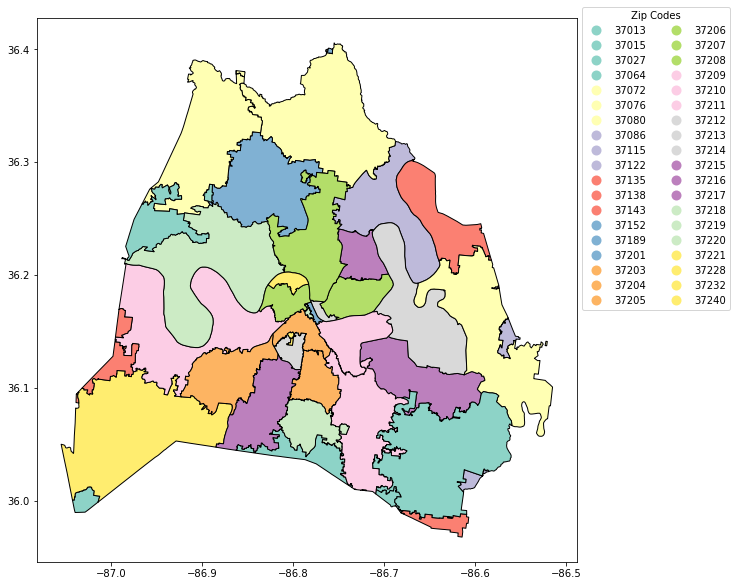

In [5]:
leg_kwds = {'title': 'Zip Codes', 'loc': 'upper left',
           'bbox_to_anchor': (1, 1.03), 'ncol': 2}
zip_codes.plot(column = 'zip_code', figsize = (10, 10), 
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds,
              cmap = 'Set3');

Adding in building permit data.

In [6]:
building_permits = pd.read_csv('../data/building_permits_issued.csv')
print(building_permits.shape)
building_permits.head(2)

(33495, 20)


C:\Users\sarei\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,37217,UNIT 9 GLASTONBURY TOWNHOMES,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217"
1,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."


In [7]:
building_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33495 entries, 0 to 33494
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    33495 non-null  object 
 1   Permit Type Description     33495 non-null  object 
 2   Permit Subtype Description  33495 non-null  object 
 3   Parcel                      33495 non-null  object 
 4   Date Entered                33495 non-null  object 
 5   Date Issued                 33495 non-null  object 
 6   Construction Cost           33493 non-null  float64
 7   Address                     33495 non-null  object 
 8   City                        33495 non-null  object 
 9   State                       33495 non-null  object 
 10  ZIP                         33495 non-null  int64  
 11  Subdivision / Lot           33495 non-null  object 
 12  Contact                     33494 non-null  object 
 13  Permit Type                 334

Subset building_permits DataFrame to only include permit type of Building Residential - New

In [8]:
new_houses = building_permits[building_permits['Permit Type Description'] == 'Building Residential - New']
new_houses.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,37217,UNIT 9 GLASTONBURY TOWNHOMES,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217"
9,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,LOT 408 THE RESERVE AT STONE HALL PH 2 SEC 1,MERITAGE HOMES OF TENNESSEE INC,CARN,CAA01R301,3687554,New Single Family construction - Total Sq foot...,14.0,37015402.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
13,2019066972,Building Residential - New,Single Family Residence,082030G01000CO,10/31/2019,11/01/2019,230707.0,900 MERIDIAN ST 4,NASHVILLE,TN,37207,UNIT J MERIDIAN TOWNHOMES,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...",CARN,CAA01R301,3728188,PERMIT TO CONSTRUCT UNIT OF MERIDIAN TOWNHOMES...,5.0,37012600.0,"900 MERIDIAN ST 4\nNASHVILLE, TN 37207\n(36.18..."
20,2019034350,Building Residential - New,Single Family Residence,091061N00200CO,06/11/2019,07/22/2019,199165.0,5905B MORROW RD,NASHVILLE,TN,37209,UNIT B HOMES AT 5905 MORROW ROAD,SHAW CONSTRUCTION,CARN,CAA01R301,3679550,"parent parcel is map 91-6 parcel 71, is zoned ...",20.0,37013300.0,"5905B MORROW RD\nNASHVILLE, TN 37209\n(36.1619..."
22,2019034344,Building Residential - New,Single Family Residence,091061N00100CO,06/11/2019,07/22/2019,199165.0,5905A MORROW RD,NASHVILLE,TN,37209,UNIT A HOMES AT 5905 MORROW ROAD,SHAW CONSTRUCTION,CARN,CAA01R301,3679530,"parent parcel is map 91-6 parcel 71, is zoned ...",20.0,37013300.0,"5905A MORROW RD\nNASHVILLE, TN 37209\n(36.1619..."


In [9]:
new_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12660 entries, 0 to 33494
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    12660 non-null  object 
 1   Permit Type Description     12660 non-null  object 
 2   Permit Subtype Description  12660 non-null  object 
 3   Parcel                      12660 non-null  object 
 4   Date Entered                12660 non-null  object 
 5   Date Issued                 12660 non-null  object 
 6   Construction Cost           12660 non-null  float64
 7   Address                     12660 non-null  object 
 8   City                        12660 non-null  object 
 9   State                       12660 non-null  object 
 10  ZIP                         12660 non-null  int64  
 11  Subdivision / Lot           12660 non-null  object 
 12  Contact                     12659 non-null  object 
 13  Permit Type                 126

In [10]:
new_houses = new_houses.rename(columns = {'ZIP': 'zip_code'})
new_houses.head(1)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,zip_code,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,37217,UNIT 9 GLASTONBURY TOWNHOMES,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217"


I realized that I needed a column with a clean street address, so I concatenated the Address, City, and State columns.

In [11]:
new_houses['full_address'] = new_houses['Address'] + ' ' + new_houses['City'] + ' ' + new_houses['State']
new_houses.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,full_address
0,2020015449,Building Residential - New,"Multifamily, Townhome",107100A00900CO,03/10/2020,03/24/2020,134334.0,450 GLASTONBURY RD 9,NASHVILLE,TN,...,UNIT 9 GLASTONBURY TOWNHOMES,BEAR CONSTRUCTION LLC,CARN,CAA03R301,3779093,"per master permit 2019031900, to construct a t...",13.0,37015804.0,"450 GLASTONBURY RD 9\nNASHVILLE, TN 37217",450 GLASTONBURY RD 9 NASHVILLE TN
9,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,...,LOT 408 THE RESERVE AT STONE HALL PH 2 SEC 1,MERITAGE HOMES OF TENNESSEE INC,CARN,CAA01R301,3687554,New Single Family construction - Total Sq foot...,14.0,37015402.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076",4327 STONE HALL BLVD HERMITAGE TN
13,2019066972,Building Residential - New,Single Family Residence,082030G01000CO,10/31/2019,11/01/2019,230707.0,900 MERIDIAN ST 4,NASHVILLE,TN,...,UNIT J MERIDIAN TOWNHOMES,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...",CARN,CAA01R301,3728188,PERMIT TO CONSTRUCT UNIT OF MERIDIAN TOWNHOMES...,5.0,37012600.0,"900 MERIDIAN ST 4\nNASHVILLE, TN 37207\n(36.18...",900 MERIDIAN ST 4 NASHVILLE TN
20,2019034350,Building Residential - New,Single Family Residence,091061N00200CO,06/11/2019,07/22/2019,199165.0,5905B MORROW RD,NASHVILLE,TN,...,UNIT B HOMES AT 5905 MORROW ROAD,SHAW CONSTRUCTION,CARN,CAA01R301,3679550,"parent parcel is map 91-6 parcel 71, is zoned ...",20.0,37013300.0,"5905B MORROW RD\nNASHVILLE, TN 37209\n(36.1619...",5905B MORROW RD NASHVILLE TN
22,2019034344,Building Residential - New,Single Family Residence,091061N00100CO,06/11/2019,07/22/2019,199165.0,5905A MORROW RD,NASHVILLE,TN,...,UNIT A HOMES AT 5905 MORROW ROAD,SHAW CONSTRUCTION,CARN,CAA01R301,3679530,"parent parcel is map 91-6 parcel 71, is zoned ...",20.0,37013300.0,"5905A MORROW RD\nNASHVILLE, TN 37209\n(36.1619...",5905A MORROW RD NASHVILLE TN


Playing with Geopy to figure out how to get latitude and longitude from a street address. The beginning of the rabbit hole...

In [12]:
#geolocator = Nominatim(user_agent="my_application")
#location = geolocator.geocode("450 GLASTONBURY RD 9 NASHVILLE")
#450 GLASTONBURY RD 9 NASHVILLE, TN 3721

In [46]:
address = '450 GLASTONBURY RD 9 NASHVILLE'
geolocator = Nominatim(user_agent='my_application')
location = geolocator.geocode(address)

In [47]:
print(location)

Glastonbury Road, Mudtavern, Glenview, Nashville-Davidson, Davidson County, Tennessee, 37217, United States of America


In [48]:
type(location)

geopy.location.Location

In [49]:
print(location.latitude, location.longitude)

36.1372682 -86.699582


Writing function to convert full_address to a point by using latitude and longitude.

In [17]:
def street_conv(addr):
    #print(addr)
    geolocator = Nominatim(user_agent="my_application")
    location = geolocator.geocode(addr)
    if location == None:
        #print('if')
        return None
    else:
        #print('else')
        return Point(location.longitude, location.latitude)

Troubleshooting the function below:

In [18]:
#address = '1382 RURAL HILL RD 320 ANTIOCH TN'
#geolocator = Nominatim(user_agent="my_application")
#location = geolocator.geocode(address)
#spot = Point(location.longitude, location.latitude)
#print(spot)

Using the function to add a column 'geometry' and convert new_houses into a GeoDataFrame.

Using .apply to apply the function to new_add. After this ran for 45 minutes, I decided that I had to subset to a smaller dataset.

In [19]:
#new_houses['geometry'] = new_houses['full_address'].apply(street_conv)
#addresses = new_add.apply(street_conv)
#new_add.head()

Getting a value count of houses by zip code to get an idea of an interesting location to check out.

In [20]:
new_houses['zip_code'].value_counts()

37013    2055
37209    1935
37207    1072
37208     971
37206     720
37076     640
37216     458
37211     443
37135     400
37221     382
37203     380
37138     377
37205     343
37215     337
37115     280
37204     267
37210     264
37212     256
37214     247
37027     239
37218     191
37217     118
37080      99
37072      67
37189      55
37220      38
37064       7
37122       6
37015       6
37143       6
27218       1
Name: zip_code, dtype: int64

North Nashville looked interesting and was a fraction of the size of the original number of rows.

In [21]:
new_houses = new_houses[new_houses['zip_code']== 37208]

In [22]:
new_houses.shape

(971, 21)

In [23]:
new_add = new_houses['full_address']
new_add.head()

78     802B  28TH AVE N NASHVILLE TN
88     804A  28TH AVE N NASHVILLE TN
93      714  28TH AVE N NASHVILLE TN
115    802A  28TH AVE N NASHVILLE TN
120     808  28TH AVE N NASHVILLE TN
Name: full_address, dtype: object

In [24]:
addresses = new_add.apply(street_conv)

In [45]:
new_houses['geometry'] = addresses

In [26]:
new_houses.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,full_address,geometry
78,2019027166,Building Residential - New,Single Family Residence,092060I00200CO,05/09/2019,05/31/2019,210881.0,802B 28TH AVE N,NASHVILLE,TN,...,"CAPITAL CITY CONSTRUCTION, LLC",CARN,CAA01R301,3668020,to construct 1872SF single family residence wi...,21.0,37014300.0,"802B 28TH AVE N\nNASHVILLE, TN 37208\n(36.1604...",802B 28TH AVE N NASHVILLE TN,POINT (-86.81892721480213 36.16065649956699)
88,2019027160,Building Residential - New,Single Family Residence,092060D00100CO,05/09/2019,05/31/2019,210881.0,804A 28TH AVE N,NASHVILLE,TN,...,"CAPITAL CITY CONSTRUCTION, LLC",CARN,CAA01R301,3668010,to construct 1872SF single family residence wi...,21.0,37014300.0,"804A 28TH AVE N\nNASHVILLE, TN 37208\n(36.1605...",804A 28TH AVE N NASHVILLE TN,POINT (-86.81892928491348 36.16066463724611)
93,2019027549,Building Residential - New,Single Family Residence,09206051000,05/10/2019,05/22/2019,286582.0,714 28TH AVE N,NASHVILLE,TN,...,"E 3 CONSTRUCTION SERVICES, LLC",CARN,CAA01R301,3668622,to construct 2544SF single family residence. 5...,21.0,37014300.0,"714 28TH AVE N\nNASHVILLE, TN 37208\n(36.15983...",714 28TH AVE N NASHVILLE TN,POINT (-86.8186712903437 36.15964949886453)
115,2019027165,Building Residential - New,Single Family Residence,092060I00100CO,05/09/2019,05/31/2019,210881.0,802A 28TH AVE N,NASHVILLE,TN,...,"CAPITAL CITY CONSTRUCTION, LLC",CARN,CAA01R301,3668016,to construct 1872SF single family residence wi...,21.0,37014300.0,"802A 28TH AVE N\nNASHVILLE, TN 37208\n(36.1604...",802A 28TH AVE N NASHVILLE TN,POINT (-86.81892721480213 36.16065649956699)
120,2019026587,Building Residential - New,Single Family Residence,09206042100,05/07/2019,05/31/2019,210881.0,808 28TH AVE N,NASHVILLE,TN,...,"CAPITAL CITY CONSTRUCTION, LLC",CARN,CAA01R301,3667099,to construct 1872SF single family residence wi...,21.0,37014300.0,"808 28TH AVE N\nNASHVILLE, TN 37208\n(36.16074...",808 28TH AVE N NASHVILLE TN,POINT (-86.81893342513619 36.16068091260435)


In [27]:
new_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 78 to 33443
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    971 non-null    object 
 1   Permit Type Description     971 non-null    object 
 2   Permit Subtype Description  971 non-null    object 
 3   Parcel                      971 non-null    object 
 4   Date Entered                971 non-null    object 
 5   Date Issued                 971 non-null    object 
 6   Construction Cost           971 non-null    float64
 7   Address                     971 non-null    object 
 8   City                        971 non-null    object 
 9   State                       971 non-null    object 
 10  zip_code                    971 non-null    int64  
 11  Subdivision / Lot           971 non-null    object 
 12  Contact                     971 non-null    object 
 13  Permit Type                 971 

In [28]:
zip_codes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
houses_geo = gpd.GeoDataFrame(new_houses, 
                           crs = zip_codes.crs, 
                           geometry = new_houses['geometry'])

In [30]:
houses_by_zip = gpd.sjoin(houses_geo, zip_codes, op = 'within')

In [31]:
houses_by_zip.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,Census Tract,Mapped Location,full_address,geometry,index_right,zip_code_right,objectid,po_name,shape_stlength,shape_starea
78,2019027166,Building Residential - New,Single Family Residence,092060I00200CO,05/09/2019,05/31/2019,210881.0,802B 28TH AVE N,NASHVILLE,TN,...,37014300.0,"802B 28TH AVE N\nNASHVILLE, TN 37208\n(36.1604...",802B 28TH AVE N NASHVILLE TN,POINT (-86.81893 36.16066),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
88,2019027160,Building Residential - New,Single Family Residence,092060D00100CO,05/09/2019,05/31/2019,210881.0,804A 28TH AVE N,NASHVILLE,TN,...,37014300.0,"804A 28TH AVE N\nNASHVILLE, TN 37208\n(36.1605...",804A 28TH AVE N NASHVILLE TN,POINT (-86.81893 36.16066),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
93,2019027549,Building Residential - New,Single Family Residence,09206051000,05/10/2019,05/22/2019,286582.0,714 28TH AVE N,NASHVILLE,TN,...,37014300.0,"714 28TH AVE N\nNASHVILLE, TN 37208\n(36.15983...",714 28TH AVE N NASHVILLE TN,POINT (-86.81867 36.15965),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
115,2019027165,Building Residential - New,Single Family Residence,092060I00100CO,05/09/2019,05/31/2019,210881.0,802A 28TH AVE N,NASHVILLE,TN,...,37014300.0,"802A 28TH AVE N\nNASHVILLE, TN 37208\n(36.1604...",802A 28TH AVE N NASHVILLE TN,POINT (-86.81893 36.16066),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
120,2019026587,Building Residential - New,Single Family Residence,09206042100,05/07/2019,05/31/2019,210881.0,808 28TH AVE N,NASHVILLE,TN,...,37014300.0,"808 28TH AVE N\nNASHVILLE, TN 37208\n(36.16074...",808 28TH AVE N NASHVILLE TN,POINT (-86.81893 36.16068),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281


Plotting new_houses on zip_codes. Starting with pulling out the polygon for 37208.

In [32]:
polygon37208 = zip_codes[zip_codes['zip_code'] == '37208']

In [33]:
polygon37208.shape

(1, 6)

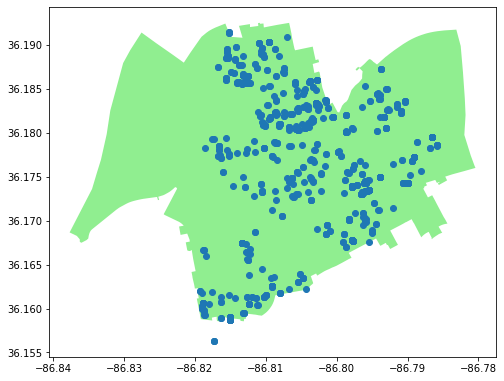

In [34]:
ax = polygon37208.plot(figsize = (8, 10), color = 'lightgreen')
houses_by_zip.plot( ax = ax);
plt.show();

Finding the center of the zip code.

In [35]:
polygon37208.geometry.centroid

<ipython-input-35-300544b2f606>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37208.geometry.centroid


40    POINT (-86.80805 36.17736)
dtype: geometry

In [36]:
center = polygon37208.geometry.centroid[40]

<ipython-input-36-2359d36f090f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37208.geometry.centroid[40]


In [37]:
print(center)

POINT (-86.80805166127745 36.17736306493883)


Reversing the points to use in Folium.

In [38]:
area_center = [center.y, center.x]

In [39]:
print(area_center)

[36.17736306493883, -86.80805166127745]


Creating map and centering on area center.

In [40]:
map_37208 = folium.Map(location =  area_center, zoom_start = 12)
map_37208

First I need to add lat and long to houses_by_zip, since it only has street address and geometry columns.

In [41]:
houses_by_zip['long'] = houses_by_zip.geometry.apply(lambda p: p.x)
houses_by_zip['lat'] = houses_by_zip.geometry.apply(lambda p: p.y)

In [42]:
houses_by_zip.head(1)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,...,full_address,geometry,index_right,zip_code_right,objectid,po_name,shape_stlength,shape_starea,long,lat
78,2019027166,Building Residential - New,Single Family Residence,092060I00200CO,05/09/2019,05/31/2019,210881.0,802B 28TH AVE N,NASHVILLE,TN,...,802B 28TH AVE N NASHVILLE TN,POINT (-86.81893 36.16066),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281,-86.818927,36.160656


Build out the map further and add the house locations.

In [43]:
map_37208 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37208).add_to(map_37208)

for row_index, row_values in houses_by_zip.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = row_values['full_address']
    icon = folium.Icon(color = "red",icon = "home", prefix = 'fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon)
    
    marker.add_to(map_37208)
map_37208.save('../maps/map37208.html')

map_37208

There are over 900 houses being built in 37208. A cluster map may be better for a quick look.

In [44]:
cluster_map_37208 = folium.Map(location =  area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_37208)

folium.GeoJson(polygon37208).add_to(cluster_map_37208)

for row_index, row_values in houses_by_zip.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = row_values['full_address']
    icon = folium.Icon(color = "red",icon = "home", prefix = 'fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37208.save('../maps/cluster37207.html')

cluster_map_37208  